In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')
feature, target = data.drop(columns=['Class']), data['Class']

In [ ]:
target.value_counts()

Class
0.0    407
1.0    393
Name: count, dtype: int64

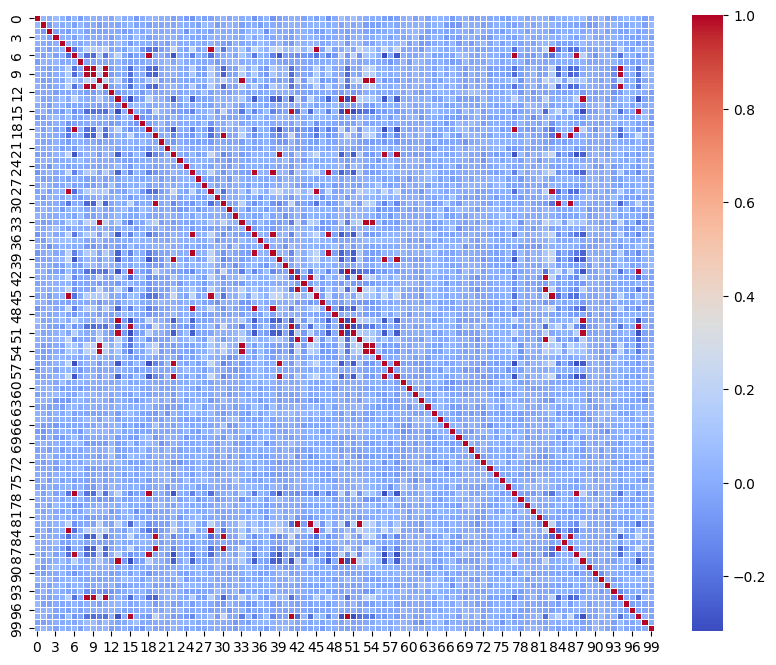

In [ ]:
correlation_matrix = np.corrcoef(feature, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.show()

In [ ]:
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
)
SCALER_CHOICE = [MaxAbsScaler(), MinMaxScaler(), Normalizer(), PowerTransformer(), RobustScaler(), None]

In [ ]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True)

In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.8 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC, OneClassSVM
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA, IncrementalPCA, FastICA
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.ensemble import HistGradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


StackingClassif = StackingClassifier(
    [

      KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance'),
    ]
)

model = Pipeline(
    [
        ('scaler', 'passthrough'),
        ('decomposition', 'passthrough'),
        ('another_decomposition', 'passthrough'),
        ('feature_selection', 'passthrough'),
        ('estimator', LogisticRegression()),
        ])
N_NEIGHBORS_CHOICE = [6, 7, 8, 9, 10]
param_grid = [
    # {
    #     'scaler': [None, Normalizer()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.73, 0.9],
    #     'estimator': [LogisticRegression()],
    #     'estimator__C': (0.01, 0.1, 0.5, 1),
    #     'estimator__solver': ['lbfgs', 'newton-cg', 'liblinear'],
    #      'estimator__multi_class': ['ovr', 'multinomial'],
    # },
    #     {
    #     'scaler': [None, StandardScaler()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components': [0.69, 0.71, 0.73],
    #     'estimator': [SGDClassifier()],
    #     'estimator__loss': ['hinge', 'log', 'modified_huber'],
    #     'estimator__penalty': ['l2', 'l1', 'elasticnet'],
    #     'estimator__alpha': [0.0001, 0.001, 0.01],
    #     'estimator__max_iter': [1000, 2000, 3000],
    #     'estimator__learning_rate': ['constant', 'optimal', 'invscaling'],
    # }
    # {
    #     'scaler': [None, StandardScaler()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components': [0.69, 0.71, 0.73],
    #     'estimator': [PassiveAggressiveClassifier()],
    #     'estimator__C': [0.01, 0.1, 1.0],
    #     'estimator__max_iter': [1000, 2000, 3000],
    #     'estimator__tol': [1e-3, 1e-4, 1e-5],
    #     'estimator__loss': ['hinge', 'squared_hinge'],
    # }
    #   {
    #     'scaler': [None, Normalizer()],
    #     'decomposition': [PCA(n_components = 0.69, whiten = True)],
    #     'decomposition__n_components': np.linspace(0.69, 0.8, 10),
    #     'estimator': [KNeighborsClassifier()],
    #     'estimator__n_neighbors': N_NEIGHBORS_CHOICE,
    #     'estimator__weights': ['uniform', 'distance'],
    #     'estimator__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    #     'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    # },
    {
        'scaler': SCALER_CHOICE,
        'decomposition': [PCA(whiten=True)],
        'decomposition__n_components': [0.69],
        'estimator': [SVC()],
        'estimator__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'estimator__C': [0.1, 1, 2, 5, 10],
        'estimator__gamma': np.linspace(0.01, 0.5, 10),
        'estimator__degree': [2, 3],
        'estimator__coef0': [0.0, 0.1],
        # 'estimator__class_weight': [None, 'balanced'],
        # 'estimator__shrinking': [True, False],
        # 'estimator__probability': [True, False],
        # 'estimator__tol': [1e-3, 1e-4, 1e-5],
        # 'estimator__max_iter': [1000, 2000, 3000],
        # 'estimator__decision_function_shape': ['ovo', 'ovr'],
    },
    # {
    #     'scaler': [None, Normalizer()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.69, 0.71, 0.73],
    #     'feature_selection': [SelectKBest(f_classif, k = 'all')],
    #     'estimator': [KNeighborsClassifier()],
    #     'estimator__n_neighbors': N_NEIGHBORS_CHOICE,
    #     'estimator__weights': ['uniform', 'distance'],
    #     'estimator__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    #     'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    #     'estimator__leaf_size': [10, 20, 30],
    #     'estimator__p': [1, 1.5, 2],
    # },
    # {
    #     'scaler': [None, Normalizer()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.69, 0.71, 0.73],
    #     'estimator': [LinearSVC()],
    #     'estimator__penalty': ['l2'],
    #     'estimator__max_iter': [500, 1000, 2000],
    #     'estimator__loss' : ['hinge', 'squared_hinge'],
    #     'estimator__tol': [1e-5],
    # },
    #   {
    #       'scaler': [None, Normalizer()],
    #       'decomposition': [PCA()],
    #       'decomposition__n_components' : [0.69, 0.71, 0.73],
    #       'estimator': [RidgeClassifier()],
    #       'estimator__alpha': [1.0, 0.1, 0.01],
    #       'estimator__max_iter': [500, 1000, 2000],
    #       'estimator__tol': [1e-5],
    # },
    # {
    #       'scaler': [None, Normalizer()],
    #       'decomposition': [PCA()],
    #       'decomposition__n_components' : [0.69, 0.71, 0.73],
    #       'estimator': [DecisionTreeClassifier()],
    #       'estimator__max_depth': [7, 10, 14, 18],
    #       'estimator__max_leaf_nodes': [15, 20, 25, 50, 100],
    # },
    # {
    #     'scaler': [None, Normalizer()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.69, 0.71, 0.73],
    #     'estimator': [MLPClassifier()],
    #     'estimator__activation': ['logistic', 'tanh'],
    #     'estimator__learning_rate' : ['adaptive'],
    #     'estimator__solver' : ['adam'],
    #     'estimator__max_iter' : [1000, 1500],
    #     'estimator__alpha' : [0.001, 0.0001],
    #     'estimator__hidden_layer_sizes': [(128, )],
    #     'estimator__early_stopping': [('early_stopping', {'patience': 3, 'validation_fraction': 0.1})],
    #     'estimator__dropout': [0.1, 0.2],
    # },
    # {
    #     'scaler': [None, Normalizer()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components': [0.69, 0.71, 0.73],
    #     'estimator': [AdaBoostClassifier()],
    #     'estimator__n_estimators': [50, 100, 200],
    #     'estimator__learning_rate': [0.01, 0.1, 1.0],
    #     'estimator__algorithm': ['SAMME', 'SAMME.R']
    # },
    # {
    #     'scaler' : SCALER_CHOICE,
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.6, 0.71, 0.73],
    #     'estimator' : [HistGradientBoostingClassifier(n_iter_no_change = 10)],
    #     'estimator__learning_rate': [0.01, 0.1, 0.5, 1],
    #     'estimator__max_iter' : [100, 200, 500],
    #     'estimator__max_depth' : [3, 5, 7],
    # },
    # {
    #     'scaler' : SCALER_CHOICE,
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.6, 0.71, 0.73],
    #     'estimator' : [BaggingClassifier(base_estimator = LinearSVC())],
    #     'estimator__n_estimators' : [10, 25, 50, 100],
    #     'estimator__bootstrap': [True, False],
    #     'estimator__bootstrap_features': [True, False],
    #     'estimator__base_estimator__max_iter' : [500, 1000, 2000],
    #     'estimator__base_estimator__loss' : ['hinge', 'squared_hinge'],
    #     'estimator__base_estimator__tol': [1e-5],
    # },
    # {
    #     'scaler': [None, StandardScaler()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components': [0.69, 0.71, 0.73],
    #     'estimator': [AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))],
    #     'estimator__n_estimators': [50, 100, 200],
    #     'estimator__learning_rate': [0.01, 0.1, 1.0],
    # },
    # {
    #     'scaler' : [None, Normalizer()],
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.69, 0.71, 0.73],
    #     'estimator' : [BaggingClassifier(base_estimator = SVC(C=1, degree=2, gamma=0.33666666666666667, tol = 1e-5))],  # Use GridSearchCV for parameter tuning
    #     'estimator__n_estimators' : [50, 100, 150],
    #     },
    # {
    #     'scaler' : SCALER_CHOICE,
    #     'decomposition': [PCA()],
    #     'decomposition__n_components' : [0.69],
    #     'estimator' : [RandomForestClassifier()],
    #     'estimator__n_estimators' : [100, 200, 500],
    #     'estimator__max_features': ['auto', 'sqrt', 'log2'],
    #     'estimator__max_depth' : [4, 5, 6, 7, 8],
    #     'estimator__criterion' : ['gini', 'entropy'],
    # },
    # {
    #       'scaler' : SCALER_CHOICE,
    #       'decomposition'  : [PCA()],
    #       'decomposition__n_components' : [0.6, 0.71, 0.73],
    #       'feature_selection': [SelectKBest(f_classif, k = 'all')],
    #       'estimator' : [VotingClassifier(
    #           [
    #               ('HGBC', HistGradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_iter=200)),
    #               ('RandomForest', RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2', n_estimators=50)),
    #               ('MLP', MLPClassifier(activation='logistic', learning_rate='adaptive', max_iter=1000)),
    #               ('KNN',  KNeighborsClassifier(leaf_size=10, n_neighbors=8, p=1.5, weights='distance')),
    #               ('SVM', SVC(C=1, degree=2, gamma=0.33666666666666667, tol = 1e-5)),
    #           ],
    #         )
    #       ]
    # },
    # {
    #         'scaler': [None, StandardScaler()],
    #         'decomposition': [PCA()],
    #         'decomposition__n_components': [0.69],
    #         'estimator': [XGBClassifier()],
    #         'estimator__learning_rate': [0.1],
    #         'estimator__n_estimators': [300],
    #         'estimator__max_depth': [5],
    #         'estimator__subsample': [0.8],
    #         'estimator__colsample_bytree': [0.8],
    #         'estimator__gamma': [0],
    #         'estimator__min_child_weight': [1, 3, 5],
    #         'estimator__reg_alpha': [0, 0.1, 0.5, 1],
    #         'estimator__reg_lambda': [0, 0.1, 1, 10],
    #         'estimator__scale_pos_weight': [1, 2, 3],
    # },
  #   {
  #           'scaler': [None, Normalizer()],
  #           'decomposition': [PCA()],
  #           'decomposition__n_components' : [0.69, 0.71, 0.73],
  #           'estimator': [GradientBoostingClassifier()],
  #           'estimator__learning_rate': [0.01, 0.1, 0.5],
  #           'estimator__n_estimators': [50, 100, 200],
  #           'estimator__max_depth': [3, 5, 7],
  #           'estimator__min_samples_split': [2, 5, 10],
  #           'estimator__min_samples_leaf': [1, 2, 4],
  #           'estimator__subsample': [0.8, 0.9, 1.0],
  # },
]

grid = GridSearchCV(model, param_grid=param_grid, scoring = 'f1', n_jobs=-1, cv = k_fold)

In [ ]:
for i in range(1, 10):
  grid.fit(feature, target)
  print(grid.best_params_)
  print(grid.best_estimator_)
  print(grid.best_score_)

{'decomposition': PCA(n_components=0.69, whiten=True), 'decomposition__n_components': 0.69, 'estimator': SVC(C=1, degree=2, gamma=0.2822222222222222), 'estimator__C': 1, 'estimator__coef0': 0.0, 'estimator__degree': 2, 'estimator__gamma': 0.2822222222222222, 'estimator__kernel': 'rbf', 'scaler': None}
Pipeline(steps=[('scaler', None),
                ('decomposition', PCA(n_components=0.69, whiten=True)),
                ('another_decomposition', 'passthrough'),
                ('feature_selection', 'passthrough'),
                ('estimator', SVC(C=1, degree=2, gamma=0.2822222222222222))])
0.9473114987093822
{'decomposition': PCA(n_components=0.69, whiten=True), 'decomposition__n_components': 0.69, 'estimator': SVC(C=10, degree=2, gamma=0.33666666666666667), 'estimator__C': 10, 'estimator__coef0': 0.0, 'estimator__degree': 2, 'estimator__gamma': 0.33666666666666667, 'estimator__kernel': 'rbf', 'scaler': None}
Pipeline(steps=[('scaler', None),
                ('decomposition', PCA(n_c

In [ ]:
  best_model = grid.best_estimator_

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    best_model,
    feature,
    target,
    n_jobs = 20,
    cv = k_fold,
    return_train_score= True
)
scores = cv_results['test_score']

In [ ]:
scores.mean()

0.9125